# 13.Cluster the stations based on facilities. What type of stations exist? Are some stations ‘odd’ in the facilities they provide? What would you suggest to do with these? Is there a correlation between station type and number of daily trains?

In [17]:
import src.data_processing.data as data
from mlxtend.frequent_patterns import apriori


Some odd stations for example supply wheelchairs but no disabled parkign spots or elevators

In [18]:
facilities = data.facilities
only_facilities= facilities[['ticket_vending_machine',
       'luggage_lockers', 'free_parking', 'taxi', 'bicycle_spots', 'blue-bike',
       'bus', 'tram', 'metro', 'wheelchair_available', 'ramp',
       'disabled_parking_spots', 'elevated_platform', 'escalator_up',
       'escalator_down', 'elevator_platform', 'audio_induction_loop']]
only_facilities

,ticket_vending_machine,luggage_lockers,free_parking,taxi,bicycle_spots,blue-bike,bus,tram,metro,wheelchair_available,ramp,disabled_parking_spots,elevated_platform,escalator_up,escalator_down,elevator_platform,audio_induction_loop
2,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1,1.0,0.0,0.0,1.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,1.0
5,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1,0.0,0.0,0.0,0.0,1.0
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0
669,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0
670,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1,0.0,0.0,0.0,0.0,1.0
672,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0


Impossible to do K-means clustering algorithms because of boolean values
Also tried Hamming distance, Jaccard similarity

We can check frequent dataset mining


In [19]:
frequent_facilities = apriori(only_facilities, min_support=0.0000001, use_colnames = True)
frequent_facilities

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.868941,(ticket_vending_machine)
1,0.032316,(luggage_lockers)
2,0.700180,(free_parking)
3,0.078995,(taxi)
4,0.346499,(bicycle_spots)
...,...,...
131066,0.001795,"(disabled_parking_spots, bus, tram, elevator_p..."
131067,0.001795,"(disabled_parking_spots, bus, elevator_platfor..."
131068,0.001795,"(disabled_parking_spots, bus, tram, elevator_p..."
131069,0.001795,"(disabled_parking_spots, bus, tram, elevator_p..."


In [20]:
# meaning of support
len(only_facilities[only_facilities["ticket_vending_machine"] == 1])/ only_facilities["ticket_vending_machine"].count()

0.8689407540394973

Prefer to cluster the stations based on logic

Stations with:
1. no facilities
2. bicycle facilities: bicycle spots, blue bike
3. transport facilities: bus, tram, metro,taxi, free_parking
4. facilities for people in wheelchair: wheelchair_available, ramp, disabled_parking_spots, elevated_platform, escalartor_up, escalator_down, elevator_platform

Some stations don't have any facilities

In [21]:

facilities["has_facilities"] = facilities[['ticket_vending_machine',
       'luggage_lockers', 'free_parking', 'taxi', 'bicycle_spots', 'blue-bike',
       'bus', 'tram', 'metro', 'wheelchair_available', 'ramp',
       'disabled_parking_spots', 'elevated_platform', 'escalator_up',
       'escalator_down', 'elevator_platform', 'audio_induction_loop']].apply(lambda x: 1 if x.sum() >=1 else 0, axis=1)
facilities

,URI,name,street,zip,city,ticket_vending_machine,luggage_lockers,free_parking,taxi,bicycle_spots,...,sales_close_friday,sales_open_saturday,sales_close_saturday,sales_open_sunday,sales_close_sunday,has_facilities,has_bicycle_facilities,has_transport_facilities,has_disabeld_persons_facilities,Total facilities
2,008895000,aalst,Stationsplein 9,9300,Aalst,1.0,0.0,1.0,1.0,1.0,...,0 days 20:00:00,0 days 06:00:00,0 days 20:00:00,0 days 06:00:00,0 days 20:00:00,1,1,0,1,BD
3,008895125,aalst-kerrebroek,Ledebaan,9300,Aalst,0.0,0.0,1.0,0.0,0.0,...,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,1,0,0,0,A
4,008891140,aalter,Stationsplein 2,9880,Aalter,1.0,0.0,1.0,0.0,1.0,...,0 days 14:15:00,0 days 07:45:00,0 days 15:00:00,0 days 07:45:00,0 days 15:00:00,1,1,0,0,B
5,008833209,aarschot,Statieplein,3200,Aarschot,1.0,0.0,1.0,0.0,1.0,...,0 days 20:00:00,0 days 06:00:00,0 days 20:00:00,0 days 07:00:00,0 days 14:15:00,1,1,0,0,B
6,008892288,aarsele,Hogenhovenstraat Zn,8700,Aarsele,1.0,0.0,0.0,0.0,0.0,...,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,1,0,0,0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,008832250,zolder,Stationsstraat Z/n,3550,Heusden - Zolder,1.0,0.0,1.0,0.0,0.0,...,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,1,0,0,0,A
669,008832334,zonhoven,Engstegenseweg,3520,Zonhoven,1.0,0.0,1.0,0.0,0.0,...,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,1,0,0,0,A
670,008895208,zottegem,Stationsplein 12,9620,Zottegem,1.0,0.0,1.0,0.0,1.0,...,0 days 20:00:00,0 days 07:15:00,0 days 14:30:00,0 days 07:15:00,0 days 14:30:00,1,1,0,0,B
672,008894821,zwijndrecht,Fortlaan 1,2070,Zwijndrecht,1.0,0.0,1.0,0.0,1.0,...,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,1,1,0,0,B


Bicycle facilities

In [22]:
facilities["has_bicycle_facilities"] = facilities[[ 'bicycle_spots', 'blue-bike']].apply(lambda x: 1 if x.sum() >=1 else 0, axis=1)
facilities

,URI,name,street,zip,city,ticket_vending_machine,luggage_lockers,free_parking,taxi,bicycle_spots,...,sales_close_friday,sales_open_saturday,sales_close_saturday,sales_open_sunday,sales_close_sunday,has_facilities,has_bicycle_facilities,has_transport_facilities,has_disabeld_persons_facilities,Total facilities
2,008895000,aalst,Stationsplein 9,9300,Aalst,1.0,0.0,1.0,1.0,1.0,...,0 days 20:00:00,0 days 06:00:00,0 days 20:00:00,0 days 06:00:00,0 days 20:00:00,1,1,0,1,BD
3,008895125,aalst-kerrebroek,Ledebaan,9300,Aalst,0.0,0.0,1.0,0.0,0.0,...,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,1,0,0,0,A
4,008891140,aalter,Stationsplein 2,9880,Aalter,1.0,0.0,1.0,0.0,1.0,...,0 days 14:15:00,0 days 07:45:00,0 days 15:00:00,0 days 07:45:00,0 days 15:00:00,1,1,0,0,B
5,008833209,aarschot,Statieplein,3200,Aarschot,1.0,0.0,1.0,0.0,1.0,...,0 days 20:00:00,0 days 06:00:00,0 days 20:00:00,0 days 07:00:00,0 days 14:15:00,1,1,0,0,B
6,008892288,aarsele,Hogenhovenstraat Zn,8700,Aarsele,1.0,0.0,0.0,0.0,0.0,...,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,1,0,0,0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,008832250,zolder,Stationsstraat Z/n,3550,Heusden - Zolder,1.0,0.0,1.0,0.0,0.0,...,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,1,0,0,0,A
669,008832334,zonhoven,Engstegenseweg,3520,Zonhoven,1.0,0.0,1.0,0.0,0.0,...,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,1,0,0,0,A
670,008895208,zottegem,Stationsplein 12,9620,Zottegem,1.0,0.0,1.0,0.0,1.0,...,0 days 20:00:00,0 days 07:15:00,0 days 14:30:00,0 days 07:15:00,0 days 14:30:00,1,1,0,0,B
672,008894821,zwijndrecht,Fortlaan 1,2070,Zwijndrecht,1.0,0.0,1.0,0.0,1.0,...,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,1,1,0,0,B


Transport facilities

In [23]:
facilities["has_transport_facilities"] = facilities[[ 'bus', 'tram', 'metro', "taxi", "free_parking", "luggage_lockers"]].apply(lambda x: 1 if x.sum() >=4 else 0, axis=1)
facilities

,URI,name,street,zip,city,ticket_vending_machine,luggage_lockers,free_parking,taxi,bicycle_spots,...,sales_close_friday,sales_open_saturday,sales_close_saturday,sales_open_sunday,sales_close_sunday,has_facilities,has_bicycle_facilities,has_transport_facilities,has_disabeld_persons_facilities,Total facilities
2,008895000,aalst,Stationsplein 9,9300,Aalst,1.0,0.0,1.0,1.0,1.0,...,0 days 20:00:00,0 days 06:00:00,0 days 20:00:00,0 days 06:00:00,0 days 20:00:00,1,1,0,1,BD
3,008895125,aalst-kerrebroek,Ledebaan,9300,Aalst,0.0,0.0,1.0,0.0,0.0,...,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,1,0,0,0,A
4,008891140,aalter,Stationsplein 2,9880,Aalter,1.0,0.0,1.0,0.0,1.0,...,0 days 14:15:00,0 days 07:45:00,0 days 15:00:00,0 days 07:45:00,0 days 15:00:00,1,1,0,0,B
5,008833209,aarschot,Statieplein,3200,Aarschot,1.0,0.0,1.0,0.0,1.0,...,0 days 20:00:00,0 days 06:00:00,0 days 20:00:00,0 days 07:00:00,0 days 14:15:00,1,1,0,0,B
6,008892288,aarsele,Hogenhovenstraat Zn,8700,Aarsele,1.0,0.0,0.0,0.0,0.0,...,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,1,0,0,0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,008832250,zolder,Stationsstraat Z/n,3550,Heusden - Zolder,1.0,0.0,1.0,0.0,0.0,...,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,1,0,0,0,A
669,008832334,zonhoven,Engstegenseweg,3520,Zonhoven,1.0,0.0,1.0,0.0,0.0,...,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,1,0,0,0,A
670,008895208,zottegem,Stationsplein 12,9620,Zottegem,1.0,0.0,1.0,0.0,1.0,...,0 days 20:00:00,0 days 07:15:00,0 days 14:30:00,0 days 07:15:00,0 days 14:30:00,1,1,0,0,B
672,008894821,zwijndrecht,Fortlaan 1,2070,Zwijndrecht,1.0,0.0,1.0,0.0,1.0,...,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,1,1,0,0,B


Disabled persons facilities

In [24]:
facilities.columns

Index(['URI', 'name', 'street', 'zip', 'city', 'ticket_vending_machine',
       'luggage_lockers', 'free_parking', 'taxi', 'bicycle_spots', 'blue-bike',
       'bus', 'tram', 'metro', 'wheelchair_available', 'ramp',
       'disabled_parking_spots', 'elevated_platform', 'escalator_up',
       'escalator_down', 'elevator_platform', 'audio_induction_loop',
       'sales_open_monday', 'sales_close_monday', 'sales_open_tuesday',
       'sales_close_tuesday', 'sales_open_wednesday', 'sales_close_wednesday',
       'sales_open_thursday', 'sales_close_thursday', 'sales_open_friday',
       'sales_close_friday', 'sales_open_saturday', 'sales_close_saturday',
       'sales_open_sunday', 'sales_close_sunday', 'has_facilities',
       'has_bicycle_facilities', 'has_transport_facilities',
       'has_disabeld_persons_facilities', 'Total facilities'],
      dtype='object')

In [25]:
facilities["has_disabeld_persons_facilities"] = facilities[[ 'wheelchair_available', 'ramp',
       'disabled_parking_spots', 'elevated_platform', 'escalator_up',
       'escalator_down', 'elevator_platform', 'audio_induction_loop']].apply(lambda x: 1 if x.sum() >=5 else 0, axis=1)
facilities

,URI,name,street,zip,city,ticket_vending_machine,luggage_lockers,free_parking,taxi,bicycle_spots,...,sales_close_friday,sales_open_saturday,sales_close_saturday,sales_open_sunday,sales_close_sunday,has_facilities,has_bicycle_facilities,has_transport_facilities,has_disabeld_persons_facilities,Total facilities
2,008895000,aalst,Stationsplein 9,9300,Aalst,1.0,0.0,1.0,1.0,1.0,...,0 days 20:00:00,0 days 06:00:00,0 days 20:00:00,0 days 06:00:00,0 days 20:00:00,1,1,0,1,BD
3,008895125,aalst-kerrebroek,Ledebaan,9300,Aalst,0.0,0.0,1.0,0.0,0.0,...,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,1,0,0,0,A
4,008891140,aalter,Stationsplein 2,9880,Aalter,1.0,0.0,1.0,0.0,1.0,...,0 days 14:15:00,0 days 07:45:00,0 days 15:00:00,0 days 07:45:00,0 days 15:00:00,1,1,0,0,B
5,008833209,aarschot,Statieplein,3200,Aarschot,1.0,0.0,1.0,0.0,1.0,...,0 days 20:00:00,0 days 06:00:00,0 days 20:00:00,0 days 07:00:00,0 days 14:15:00,1,1,0,0,B
6,008892288,aarsele,Hogenhovenstraat Zn,8700,Aarsele,1.0,0.0,0.0,0.0,0.0,...,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,1,0,0,0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,008832250,zolder,Stationsstraat Z/n,3550,Heusden - Zolder,1.0,0.0,1.0,0.0,0.0,...,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,1,0,0,0,A
669,008832334,zonhoven,Engstegenseweg,3520,Zonhoven,1.0,0.0,1.0,0.0,0.0,...,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,1,0,0,0,A
670,008895208,zottegem,Stationsplein 12,9620,Zottegem,1.0,0.0,1.0,0.0,1.0,...,0 days 20:00:00,0 days 07:15:00,0 days 14:30:00,0 days 07:15:00,0 days 14:30:00,1,1,0,0,B
672,008894821,zwijndrecht,Fortlaan 1,2070,Zwijndrecht,1.0,0.0,1.0,0.0,1.0,...,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,1,1,0,0,B


Create a code for the total kinds of facilities each station has

In [26]:
# facilities["Total facilities"] = facilities[['has_facilities', 'has_wheelchair_facilities','has_bicycle_facilities','has_transport_facilities']]\
#     .apply(lambda x: "Z" if x[0] == 0 else "".join([chr(65+i) for i in range(0,3) if x[i]]), axis=1)
# facilities



In [27]:
def get_facilities(x):
    if x[0] == 0:
        return "Z"
    # if all facilities are 0, then return A
    elif x[0] == 1 and x[1] == 0 and x[2] == 0 and x[3] == 0:
        return "A"
    # else, return the facilities that are available
    else:
        return "".join([chr(65+i) for i in range(1,4) if x[i]])

# apply the function to the facilities dataframe
facilities["Total facilities"] = facilities[['has_facilities', 'has_bicycle_facilities','has_transport_facilities', 'has_disabeld_persons_facilities' ]].apply(get_facilities, axis=1)
facilities


,URI,name,street,zip,city,ticket_vending_machine,luggage_lockers,free_parking,taxi,bicycle_spots,...,sales_close_friday,sales_open_saturday,sales_close_saturday,sales_open_sunday,sales_close_sunday,has_facilities,has_bicycle_facilities,has_transport_facilities,has_disabeld_persons_facilities,Total facilities
2,008895000,aalst,Stationsplein 9,9300,Aalst,1.0,0.0,1.0,1.0,1.0,...,0 days 20:00:00,0 days 06:00:00,0 days 20:00:00,0 days 06:00:00,0 days 20:00:00,1,1,0,1,BD
3,008895125,aalst-kerrebroek,Ledebaan,9300,Aalst,0.0,0.0,1.0,0.0,0.0,...,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,1,0,0,0,A
4,008891140,aalter,Stationsplein 2,9880,Aalter,1.0,0.0,1.0,0.0,1.0,...,0 days 14:15:00,0 days 07:45:00,0 days 15:00:00,0 days 07:45:00,0 days 15:00:00,1,1,0,0,B
5,008833209,aarschot,Statieplein,3200,Aarschot,1.0,0.0,1.0,0.0,1.0,...,0 days 20:00:00,0 days 06:00:00,0 days 20:00:00,0 days 07:00:00,0 days 14:15:00,1,1,0,0,B
6,008892288,aarsele,Hogenhovenstraat Zn,8700,Aarsele,1.0,0.0,0.0,0.0,0.0,...,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,1,0,0,0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,008832250,zolder,Stationsstraat Z/n,3550,Heusden - Zolder,1.0,0.0,1.0,0.0,0.0,...,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,1,0,0,0,A
669,008832334,zonhoven,Engstegenseweg,3520,Zonhoven,1.0,0.0,1.0,0.0,0.0,...,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,1,0,0,0,A
670,008895208,zottegem,Stationsplein 12,9620,Zottegem,1.0,0.0,1.0,0.0,1.0,...,0 days 20:00:00,0 days 07:15:00,0 days 14:30:00,0 days 07:15:00,0 days 14:30:00,1,1,0,0,B
672,008894821,zwijndrecht,Fortlaan 1,2070,Zwijndrecht,1.0,0.0,1.0,0.0,1.0,...,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,1,1,0,0,B


Create the different clusters

In [28]:
facilities["Total facilities"].unique()

array(['BD', 'A', 'B', 'BC', 'BCD', 'Z', 'D'], dtype=object)

# Number of daily trains

In [29]:
trips = data.full_trips

In [30]:
daily_trains = trips["Name of the stop"].value_counts().reset_index().rename(columns={"index": "Name of the stop", "Name of the stop": "count"}).astype({"count": int})
# daily_trains["count"] = daily_trains["count"]/7
daily_trains["Name of the stop"]=daily_trains["Name of the stop"].str.lower()
daily_trains

,Name of the stop,count
0,brussel-zuid/bruxelles-midi,7421
1,brussel-noord/bruxelles-nord,6899
2,brussel-centraal/bruxelles-central,6892
3,brussel-kapellekerk/bruxelles-chapelle,6892
4,brussel-congres/bruxelles-congrès,6892
...,...,...
622,oostende-zeehaven,3
623,leuven-bundel m,2
624,hasselt-aflos l.35/1,1
625,gent-zeehaven,1


In [31]:
facilities = facilities.merge(daily_trains, left_on = "name", right_on="Name of the stop")
facilities

,URI,name,street,zip,city,ticket_vending_machine,luggage_lockers,free_parking,taxi,bicycle_spots,...,sales_close_saturday,sales_open_sunday,sales_close_sunday,has_facilities,has_bicycle_facilities,has_transport_facilities,has_disabeld_persons_facilities,Total facilities,Name of the stop,count
0,008895000,aalst,Stationsplein 9,9300,Aalst,1.0,0.0,1.0,1.0,1.0,...,0 days 20:00:00,0 days 06:00:00,0 days 20:00:00,1,1,0,1,BD,aalst,1262
1,008895125,aalst-kerrebroek,Ledebaan,9300,Aalst,0.0,0.0,1.0,0.0,0.0,...,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,1,0,0,0,A,aalst-kerrebroek,70
2,008891140,aalter,Stationsplein 2,9880,Aalter,1.0,0.0,1.0,0.0,1.0,...,0 days 15:00:00,0 days 07:45:00,0 days 15:00:00,1,1,0,0,B,aalter,1285
3,008833209,aarschot,Statieplein,3200,Aarschot,1.0,0.0,1.0,0.0,1.0,...,0 days 20:00:00,0 days 07:00:00,0 days 14:15:00,1,1,0,0,B,aarschot,1250
4,008892288,aarsele,Hogenhovenstraat Zn,8700,Aarsele,1.0,0.0,0.0,0.0,0.0,...,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,1,0,0,0,A,aarsele,268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548,008832250,zolder,Stationsstraat Z/n,3550,Heusden - Zolder,1.0,0.0,1.0,0.0,0.0,...,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,1,0,0,0,A,zolder,217
549,008832334,zonhoven,Engstegenseweg,3520,Zonhoven,1.0,0.0,1.0,0.0,0.0,...,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,1,0,0,0,A,zonhoven,217
550,008895208,zottegem,Stationsplein 12,9620,Zottegem,1.0,0.0,1.0,0.0,1.0,...,0 days 14:30:00,0 days 07:15:00,0 days 14:30:00,1,1,0,0,B,zottegem,974
551,008894821,zwijndrecht,Fortlaan 1,2070,Zwijndrecht,1.0,0.0,1.0,0.0,1.0,...,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,1,1,0,0,B,zwijndrecht,827


<AxesSubplot: xlabel='Total facilities'>

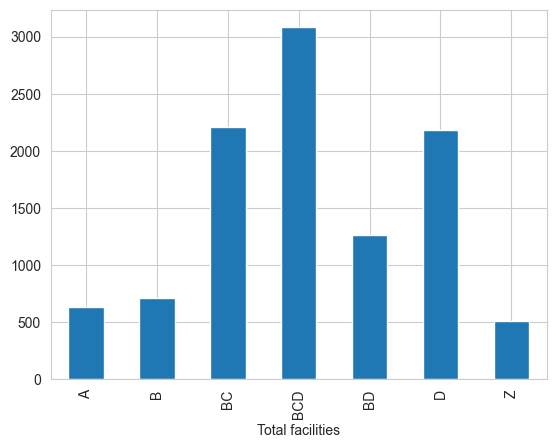

In [32]:
facilities.groupby("Total facilities")["count"].mean().plot.bar()